<a href="https://colab.research.google.com/github/LemonHike/Projects/blob/main/ML_Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group project**

## Import Packages

In [ ]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from numpy.random import permutation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV


# Plots
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas.plotting import boxplot
from pandas.plotting import autocorrelation_plot

# Load & Pre-Process Data

In [ ]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv').drop(columns=['w'])

assert test.isnull().sum().sum() == 0 and train.isnull().sum().sum() == 0 # check for missing values

train.describe, test.describe

(<bound method NDFrame.describe of              y         0         1  ...        47        48        49
 0     0.483130  0.790980  0.702555  ...  1.195992  1.165327  0.771110
 1     1.135624  0.765286  0.604512  ...  1.331348  1.267123  1.292718
 2     0.686081  0.702834  0.637708  ...  0.442759  0.487557  0.699007
 3    -1.342005  0.018378 -0.097297  ... -1.490786 -1.856840 -1.441472
 4    -0.241418  0.463120  0.665307  ... -0.768820 -0.662573 -0.211837
 ...        ...       ...       ...  ...       ...       ...       ...
 7321  1.026517  1.002615  1.007519  ...  1.028043  1.032729  1.021831
 7322  1.039843  1.067617  1.075324  ...  1.048422  1.051767  1.044205
 7323  1.064836  0.976882  0.978272  ...  1.074744  1.074917  1.068486
 7324  1.052061  0.851952  0.853579  ...  1.050434  1.056399  1.056941
 7325  1.028131  1.155392  1.157401  ...  1.046885  1.045546  1.026792
 
 [7326 rows x 51 columns]>,
 <bound method NDFrame.describe of              0         1         2  ...        47

# Features and Targets Data Frames


In [ ]:
train_df_targets = train['y']
train_df_features = train.drop(columns=['y'])

# Feature Scaling

In [ ]:
#STANDARDIZATION
#not used as it gives better performance only in the svr method case
'''
sscaler = StandardScaler()

train_features_scaled = pd.DataFrame(sscaler.fit_transform(train.drop(columns=['y']))) #scaled train dataframe features
test_scaled = pd.DataFrame(sscaler.transform(test)) #scaled test dataframe

train_features_scaled.columns = train.drop(columns=['y']).columns #rename columns as they were before the scaling
test_scaled.columns = test.columns

train = train_features_scaled 
test = test_scaled

train_df_features = train

train = pd.concat([train_df_targets, train], axis=1) #rebuilding the train datafram with standardized features and raw y
'''

'\ntrain.mean(axis=0)\ntrain.std(axis=0)\ntest.mean(axis=0)\ntest.std(axis=0)\n'

# Corr Matrix

In [ ]:
corr_matrix = train.corr()
corr_matrix["y"].sort_values(ascending=False)

# Split

In [ ]:
train_set, test_set = train_test_split(train, test_size=0.25, random_state=100)

train_set_features = train_set.drop(columns=['y'])
train_set_features_f = train.drop(columns=['y'])
train_set_targets = train_set["y"]
train_set_targets_f= train["y"]

test_set_features = test_set.drop(columns=['y'])
test_set_targets = test_set['y']

# Data Visualization

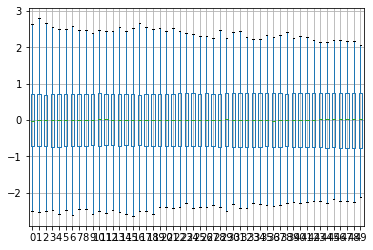

In [ ]:
boxplot(train_df_features)

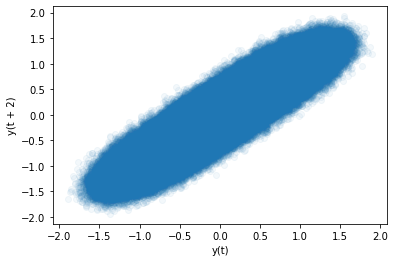

In [ ]:
lag_plot(train_df_features.T, lag=2, alpha=0.05)

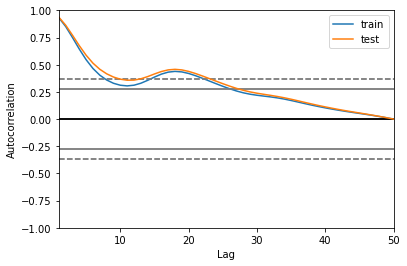

In [ ]:
autocorrelation_plot(train_df_features.T, label='train')
autocorrelation_plot(test.T, label = 'test')

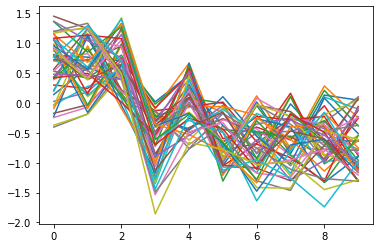

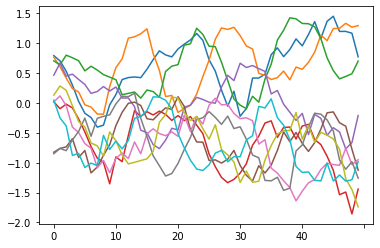

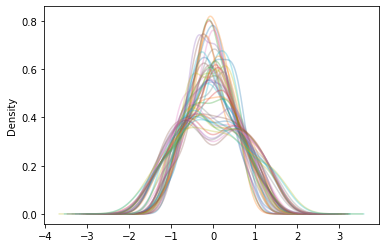

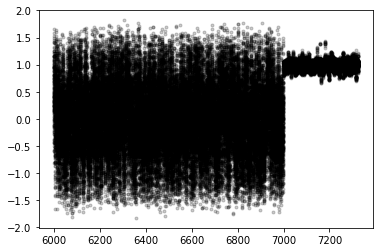

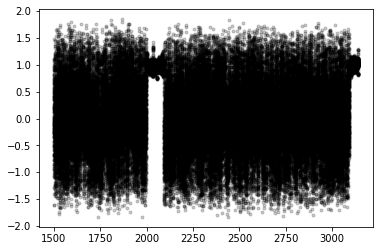

In [ ]:
train_df_features.iloc[:10,:].plot().get_legend().remove()
train_df_features.iloc[:10,:].T.plot().get_legend().remove()

train_df_features.iloc[:100,:].plot(kind='kde', alpha=0.3).get_legend().remove()
train_df_features.iloc[6000:,:].plot(style='k.', alpha=0.2).get_legend().remove()
test.iloc[1500:,:].plot(style='k.', alpha=0.2).get_legend().remove()

# Linear Regression 




In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(train_set_features, train_set_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#Assessing the performance (LR)




In [ ]:
test_prediction_lr = lin_reg.predict(test_set_features)
train_prediction_lr = lin_reg.predict(train_set_features)


print("Test: ", np.sqrt(mean_squared_error(test_prediction_lr, test_set_targets)))
print("Test Random Predictions: ", np.sqrt(mean_squared_error(permutation(test_prediction_lr), test_set_targets)))
print("Train: ", np.sqrt(mean_squared_error(train_prediction_lr, train_set_targets)))
print("Train Random Predictions: ", np.sqrt(mean_squared_error(permutation(train_prediction_lr), train_set_targets)))

Test:  0.1510315376828839
Test Random Predictions:  1.2845175256286827
Train:  0.15068835901306452
Train Random Predictions:  1.282134252293676


# Cross Validation: LR

In [ ]:
lmCV = LinearRegression()

param_grid = {
  'fit_intercept':[True,False]
}
CV_olsmodel = GridSearchCV(estimator=lmCV, param_grid=param_grid, cv=10)
CV_olsmodel.fit(train_set_features, train_set_targets)
print(CV_olsmodel.best_params_)

{'fit_intercept': True}


In [ ]:
lmCV = lmCV.set_params(**CV_olsmodel.best_params_)
lmCV.fit(train_set_features, train_set_targets)
train_prediction_lr_CV = lmCV.predict(train_set_features)
test_prediction_lr_CV = lmCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_lr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_lr_CV, test_set_targets)))

Train (CV):  0.15068835901306452
Test (CV):  0.15103153768288394


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
ridgeregCV = Ridge()

param_grid = {
  'alpha': [10,4,2,1.0,0.8,0.5,0.3,0.1,0.01]
}
CV_rrmodel = GridSearchCV(estimator=ridgeregCV, param_grid=param_grid, cv=10)
CV_rrmodel.fit(train_set_features, train_set_targets)
print(CV_rrmodel.best_params_)

{'alpha': 4}


In [ ]:
ridgeregCV = ridgeregCV.set_params(**CV_rrmodel.best_params_)
ridgeregCV.fit(train_set_features, train_set_targets)
train_prediction_rr_CV = ridgeregCV.predict(train_set_features)
test_prediction_rr_CV = ridgeregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_rr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_rr_CV, test_set_targets)))

Train (CV):  0.1505967731251267
Test (CV):  0.15132086559656452


#KNearestNeighbors

In [ ]:
kn = KNeighborsRegressor(n_neighbors = 9)
kn.fit(train_set_features, train_set_targets)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

#Assessing the Performance(KNN)

In [ ]:
test_prediction_k = kn.predict(test_set_features)
print("Test", np.sqrt(mean_squared_error(test_set_targets, test_prediction_k)))

Prediction 0.16929127137588615


# Cross Validation: KNN

In [ ]:
min_score = np.inf
for n_neighbors in range(1,20):
    kn = KNeighborsRegressor(n_neighbors = n_neighbors)
    scores = cross_val_score(kn, train_set_features, train_set_targets,
                         scoring="neg_mean_squared_error", cv=5)
    if -scores.mean() <= min_score:
      n_best = n_neighbors
      min_score = -scores.mean()
    
    print("N: {} Score: {} STD: {}".format(n_neighbors, -np.mean(scores), scores.std()))

print("best n_neighbors", n_best)

kn = KNeighborsRegressor(n_neighbors = n_best)
kn.fit(train_set_features, train_set_targets)
test_prediction_k = kn.predict(test_set_features)
print("Prediction", np.sqrt(mean_squared_error(test_set_targets, test_prediction_k)))

N: 1 Score: 0.052526922672319655 STD: 0.0019046705648024782
N: 2 Score: 0.038505937423717905 STD: 0.0028201434973054583
N: 3 Score: 0.03430603486880521 STD: 0.0019515155012221367
N: 4 Score: 0.03297124818058844 STD: 0.0013554488550686038
N: 5 Score: 0.032462520158141196 STD: 0.0014859501323032016
N: 6 Score: 0.03182330236655962 STD: 0.0013488002579952175
N: 7 Score: 0.031565734845252644 STD: 0.0012797873797748363
N: 8 Score: 0.0314778710123415 STD: 0.0011409170432932973
N: 9 Score: 0.03163102106618389 STD: 0.000931749929030798
N: 10 Score: 0.03146551374158945 STD: 0.0008371687101731116
N: 11 Score: 0.031264743619664234 STD: 0.0007976042317491176
N: 12 Score: 0.03144961095795882 STD: 0.000983666758455631
N: 13 Score: 0.031633932249095095 STD: 0.0010140459307749798
N: 14 Score: 0.0317330401592219 STD: 0.0008943481445131744
N: 15 Score: 0.031959192769069035 STD: 0.0009868683092560493
N: 16 Score: 0.032201549757863615 STD: 0.0010069178692853065
N: 17 Score: 0.032359809372355296 STD: 0.0011

#Decision Tree


In [ ]:
tree_reg = DecisionTreeRegressor(random_state=100)
tree_reg.fit(train_set_features, train_set_targets)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

#Assessing the performance (Decision Tree)

In [ ]:
predictions = tree_reg.predict(test_set_features)
tree_mse = mean_squared_error(test_set_targets, predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.2136981386529749


#Lasso

In [ ]:
reg = linear_model.Lasso(alpha=0.0000001)
reg.fit(train_set_features, train_set_targets)

test_prediction_l = reg.predict(test_set_features)
print("Prediction", np.sqrt(mean_squared_error(test_set_targets, test_prediction_l)))


Prediction 0.1513760064942879


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.07514187244909, tolerance: 0.3636403088100876
  positive)


#Support Vector Regression

In [ ]:
svr_rbf = SVR(kernel='rbf', C=2, gamma=0.025)
svr_rbf.fit(train_set_features, train_set_targets)

SVR(C=2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.02,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
test_prediction_svr = svr_rbf.predict(test_set_features)
train_prediction_svr = svr_rbf.predict(train_set_features)


print("Test: ", np.sqrt(mean_squared_error(test_prediction_svr, test_set_targets)))
print("Train: ", np.sqrt(mean_squared_error(train_prediction_svr, train_set_targets)))


Test:  0.1350120500933701
Train:  0.11243693854335046


# Cross Validation SVR

In [ ]:
svr = SVR()

kernel_opt = ['rbf', 'linear']
c_range = [2, 5]
epsilon_range = [0.025, 0.075]
gamma_range = [0.01, 0.025, 0.075]

param_grid = {
  'kernel':   kernel_opt,
  'C':        c_range,
  'epsilon':  epsilon_range,
  'gamma' :   gamma_range
}
svr_CV = GridSearchCV(svr, param_grid=param_grid, cv=5, verbose=3)
svr_CV.fit(train_set_features, train_set_targets)
print(svr_rbf_CV.best_params_)

In [ ]:
svr = svr.set_params(**svr_CV.best_params_)
svr.fit(train_set_features, train_set_targets)

train_prediction_svr_CV = svr.predict(train_set_features)
test_prediction_svr_CV = svr.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_svr_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_svr_CV, test_set_targets)))

Train (CV):  0.0237871531226126
Test (CV):  0.17120562858705488


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RForregCV = RandomForestRegressor(random_state=0)

param_grid = {
  'max_depth': [ 6., 15., 30., 50.],
  'n_estimators': [ 10,  100, 150, 200]
}

CV_rfmodel = GridSearchCV(RForregCV, param_grid=param_grid, cv=5)
CV_rfmodel.fit(train_set_features, train_set_targets)
print(CV_rfmodel.best_params_)

In [ ]:
RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
RForregCV.fit(train_set_features, train_set_targets)
train_prediction_rf_CV = RForregCV.predict(train_set_features)
test_prediction_rf_CV = RForregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_rf_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_rf_CV, test_set_targets)))

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, test_set_features, test_set_targets,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

In [ ]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [30, 100, 500, 1000], 'max_features': [8, 16, 30, 50]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=100)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(train_set_features, train_set_targets)

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

# MLP Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor

# finding optimal parameters
MLPregCV = MLPRegressor(random_state=42)

param_grid = {
 'learning_rate': ["constant", "invscaling", "adaptive"],
 'solver' : ['lbfgs', 'sgd', 'adam'],
 'hidden_layer_sizes': [(62,), (64,), (63,)],
 'alpha': [1.2, 1.4,1.6, 1.5],
 'activation': ["logistic", "relu", "tanh"]
}
CV_MLPmodel = GridSearchCV(MLPregCV, param_grid=param_grid, cv=5)
CV_MLPmodel.fit(train_set_features, train_set_targets)
print(CV_MLPmodel.best_params_)

In [ ]:
MLPregCV = MLPregCV.set_params(**CV_MLPmodel.best_params_)
MLPregCV.fit(train_set_features, train_set_targets)

train_prediction_nn_CV = MLPregCV.predict(train_set_features)
test_prediction_nn_CV = MLPregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_nn_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_nn_CV, test_set_targets)))

# Bidirectional Stacked LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dense

In [ ]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
ft_len = len(train_df_features)
dataset = np.array(train_df_features[:ft_len].T)

n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)

n_features = X.shape[2]

# define model
lstm = Sequential()
lstm.add(Bidirectional( LSTM( 64, activation='relu', return_sequences=True,
                             input_shape=(n_steps, n_features) ) ))
lstm.add(LSTM(128, activation='relu'))
lstm.add(Dense(n_features))
lstm.compile(optimizer='adam', loss='mse')

# fit model
lstm.fit(X, y, epochs=200, steps_per_epoch=5, verbose=0)

# prediction
x_input = dataset[-n_steps:].reshape((1, n_steps, n_features))
yhat = lstm.predict(x_input, verbose=0).reshape(ft_len)

print(yhat, np.array(train_df_targets[:ft_len]))
print("Test: ", np.sqrt(mean_squared_error(yhat, np.array(train_df_targets[:ft_len]))))

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBoostregCV = GradientBoostingRegressor(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = {
  'max_depth': [ 3., 4., 5.],
  'subsample': [0.7, 0.8, 0.9],
  'n_estimators': [50, 100,150],
  'learning_rate': [0.1, 0.2, 0.3]
}
CV_gbmodel = GridSearchCV(estimator=GBoostregCV, param_grid=param_grid, cv=10)
CV_gbmodel.fit(train_set_features, train_set_targets)
print(CV_gbmodel.best_params_)

{'learning_rate': 0.1, 'max_depth': 5.0, 'n_estimators': 150, 'subsample': 0.8}


In [ ]:
GBoostregCV = GBoostregCV.set_params(**CV_gbmodel.best_params_)
GBoostregCV.fit(train_set_features, train_set_targets)

train_prediction_gb_CV = GBoostregCV.predict(train_set_features)
test_prediction_gb_CV = GBoostregCV.predict(test_set_features)

print("Train (CV): ", np.sqrt(mean_squared_error(train_prediction_gb_CV, train_set_targets)))
print("Test (CV): ", np.sqrt(mean_squared_error(test_prediction_gb_CV, test_set_targets)))

# LSTM Vanilla

In [ ]:
train_targets_n=train_set_targets.to_numpy()
train_features_n=train_set_features.to_numpy()
y=train_targets_n
X=train_features_n

n_steps=50
n_features=1
X=X.reshape(X.shape[0], X.shape[1], n_features)

model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X, y, epochs=100, verbose=0)

x_input = train_features_n[len(train_features_n)-1]
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

test_features_n=test_set_features.to_numpy()
Xn=test_features_n
Xn=Xn.reshape(Xn.shape[0], Xn.shape[1], n_features)


from sklearn.metrics import mean_squared_error

error=mean_squared_error(model.predict(Xn), test_set_targets)

print(error)

#ARIMA#



```
# N.B: the following code takes a couple of hours

from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
 
 
test_arima = pd.read_csv('/content/test.csv')
test_feature_arima = test_arima.drop(columns ='49').T
test_targets_arima = test_arima['49'].T
test_arima = test_arima.T
 
# evaluating the arima model on a given time series and with a given set of hyperparameters
def evaluate_arima_model(test_feature_arima, m , order):
    arma_mod = ARIMA(test_feature_arima[m], order=order, enforce_stationarity=False).fit()
    pred_value = arma_mod.forecast()
    prediction = [pred_value[49]]
    a = np.sqrt((test_targets_arima[m] - prediction)**2)
    return a ,prediction
 
# implementing a grid search approach to find the best hyperparameters for a given time series
def evaluate_models(test_feature_arima, m, p_values, d_values, q_values):
    test_feature = test_feature_arima.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                mod = evaluate_arima_model(test_feature_arima, m, order)
                mse = mod[0]
                if mse < best_score:
                    best_score, best_cfg = mse, order
                if mse <= 0.1:
                    break
    return best_cfg
 
# final predictions
def arma_stat_final(test, ini, fin):
    prediction = []
    opt = []
    for x in range(ini,fin):
        n = evaluate_models(test_feature_arima, x, [1,2,3,4,5], [0,1,2,3], [1,2,3,4,5])
        arma_mod = ARIMA(test[x], order=n, enforce_stationarity=False).fit()
        pred_value = arma_mod.forecast()
        p = [pred_value[50]]
        prediction += p
        opt += [n]
        print(f'steps missing = {fin-x-1}, index = {x}')
    return prediction
 
prediction = arma_stat_final(test,0, 3141)


```



#Final Modelling

In [ ]:
# MLP Neural Network
from sklearn.neural_network import MLPRegressor

MLPRreg = MLPRegressor(activation= 'tanh', solver='lbfgs', alpha= 1.5, hidden_layer_sizes= (64,), learning_rate= 'constant')
MLPRreg.fit(train_df_features, train_df_targets)
MLPRreg.score(train_df_features, train_df_targets)

# Test DataFrame Prediction

In [ ]:
# Neural Networks
test_df_predictions = MLPRreg.predict(test) #actual prediction on the test dataframe, not the test set resulted from the split in the train dataframe
np.savetxt("test_predictions.txt", test_df_predictions, delimiter=",")